In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

R_SUN = 6.957e10

In [2]:
def read_solar_S_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T'])
        rho0 = np.array(f['/rho'])
        p0 = np.array(f['/p'])

        variables = {'r_over_R': r_over_R, 'c_s': c_s, 'Gamma_1': Gamma_1, 'T0': T0, 'rho0': rho0, 'p0': p0}
    return variables

In [3]:
solar_S = read_solar_S_hdf5('../additional_files/solar_s.h5')

In [46]:
1000*dz == R_END

False

In [ ]:
N-1 = T/dt
dt = T(N-1)

In [68]:
(999*dz + R_START - R_END)/R_SUN

3.454447717901035e-14

In [84]:
R_START = 0.80 * R_SUN
R_END   = 0.90 * R_SUN

L_z = R_END - R_START
N = 1000
dz = L_z / (N-1)
999*dz + R_START - R_END

0.0

In [50]:
R_START = 0.80 * R_SUN
R_END   = 0.90 * R_SUN

z = np.linspace(R_START, R_END, 1000)
dz = z[1] - z[0]

wanted_integration_start = 0.97 * R_SUN
# Find closest multiple of dz to wanted_integration_start
integration_start = R_START # This is the radius where we start integrating
while integration_start < wanted_integration_start:
    integration_start += dz

# Find index of integration_start in the solar S data using while loop
i = 0
while solar_S['r_over_R'][i] > integration_start / R_SUN:
    i += 1

In [5]:
r_before = solar_S['r_over_R'][i] * R_SUN
r_after = solar_S['r_over_R'][i-1] * R_SUN
rho0_before = solar_S['rho0'][i]
rho0_after = solar_S['rho0'][i-1]
p0_before = solar_S['p0'][i]
p0_after = solar_S['p0'][i-1]
T0_before = solar_S['T0'][i]
T0_after = solar_S['T0'][i-1]

# Linear interpolation
rho0 = rho0_before + (rho0_after - rho0_before) / (r_after - r_before) * (integration_start - r_before)
p0 = p0_before + (p0_after - p0_before) / (r_after - r_before) * (integration_start - r_before)
T0 = T0_before + (T0_after - T0_before) / (r_after - r_before) * (integration_start - r_before)

initial_value_index = i

In [6]:
solar_s_size = 2482

m_initial = 0.0
C = 4 * np.pi * R_SUN**3
#backward integration
for i in range(solar_s_size-2, initial_value_index-1, -1):
    dr = solar_S['r_over_R'][i] - solar_S['r_over_R'][i+1]
    m_initial += C * 0.5 * (solar_S['rho0'][i] * solar_S['r_over_R'][i]**2 + solar_S['rho0'][i+1] * solar_S['r_over_R'][i+1]**2) * dr

# mass at the last interpolation point
m_initial += C * 0.5 * (rho0 * (integration_start/R_SUN)**2 + solar_S['rho0'][initial_value_index] * (solar_S['r_over_R'][initial_value_index])**2) * (integration_start / R_SUN - solar_S['r_over_R'][initial_value_index])

In [11]:
INTEGRATION_END_TOP = 1.1 * R_SUN
INTEGRATION_END_BOTTOM = 0.65 * R_SUN

r_up = [integration_start]
while r_up[-1] < INTEGRATION_END_TOP:
    r_up.append(r_up[-1] + dz)

r_down = [integration_start]
while r_down[-1] > INTEGRATION_END_BOTTOM:
    r_down.append(r_down[-1] - dz)

r_up = np.array(r_up)
r_down = np.array(r_down)

r  = np.concatenate((r_down[::-1], r_up[1:]))

In [78]:
value_start_index = np.where(np.abs(r-R_START)< 1.0)[0][0]

(0.0, 10.0)

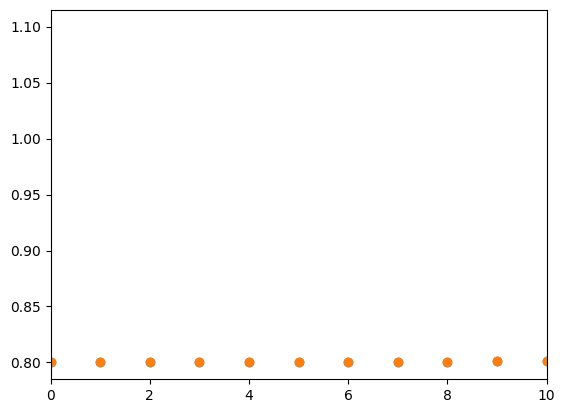

In [82]:
plt.plot(np.arange(len(r)-value_start_index), r[value_start_index:]/R_SUN, 'o')
plt.plot(np.arange(len(z)), z/R_SUN, 'o')
plt.xlim(0,10)

In [23]:
len(np.where(r>=R_START)[0])

2999

In [35]:
np.where(r>=R_START)[0]

1499

In [40]:
N_

2999

In [37]:
N_ = len(np.where(r>=R_START)[0])

In [43]:
np.where(r==R_END)[0]

array([], dtype=int64)

In [42]:
r[np.where(r>=R_START)[0]:np.where(r==R_END)[0]]

TypeError: only integer scalar arrays can be converted to a scalar index

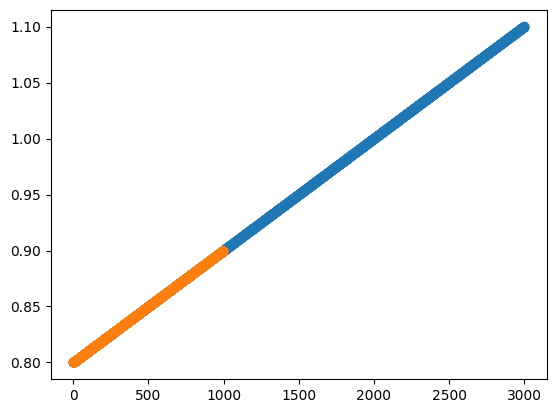

In [28]:
print(solar_S['r_over_R'][i-1] < integration_start / R_SUN)

False


In [12]:
solar_S['r_over_R']

array([0.       , 0.0013911, 0.0014098, ..., 1.0006968, 1.0007047,
       1.0007126])

In [89]:
#define R_START 0.70 // In units of solar radii
#define R_END 0.97 // In units of solar radii
#define X_SIZE 0.1 // In units of solar radii
#define Y_SIZE 0.1 // In units of solar radii
#define NX 400 // Number of grid points in x-direction
#define NY 20 // Number of grid points in y-direction
#define NZ 20 // Number of grid points in z-direction

#define R_SUN 6.957e10 // solar radius [cm]

# Har disse variablene å leke med og vil sørge for at dz=1000cm

R_START = 0.7
R_END = 0.9

Z_SIZE = (R_END - R_START)

In [106]:
dz = 0.01

N = Z_SIZE/dz - 1
N

19.000000000000007

In [103]:
(0.9 - 0.7)

0.20000000000000007

In [100]:
0.2/0.1 - 1

1.0

In [113]:
from astropy import units as u
(0.03*u.R_sun).to("Mm")

<Quantity 20.871 Mm>

In [111]:
G = 6.6743e-8 
m_i = 1986396393311409422587744609107968
r_i = 67545722408**2
rho_i = 0.003164
T_i = 154444
p_i = 63411713243

dp_dr = G * m_i / r_i**2 * rho_i

0.4*T_i/p_i * dp_dr

1.963261989714118e-26

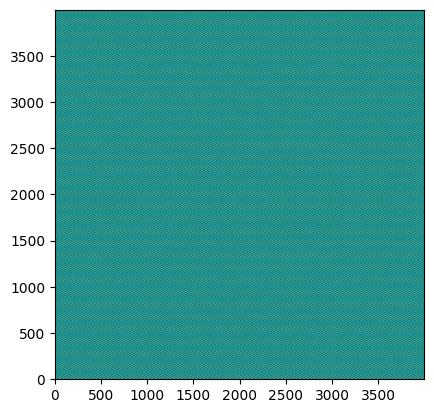

In [81]:
plt.imshow(f, origin='lower')

Text(0.5, 1.0, 'Expected derivative')

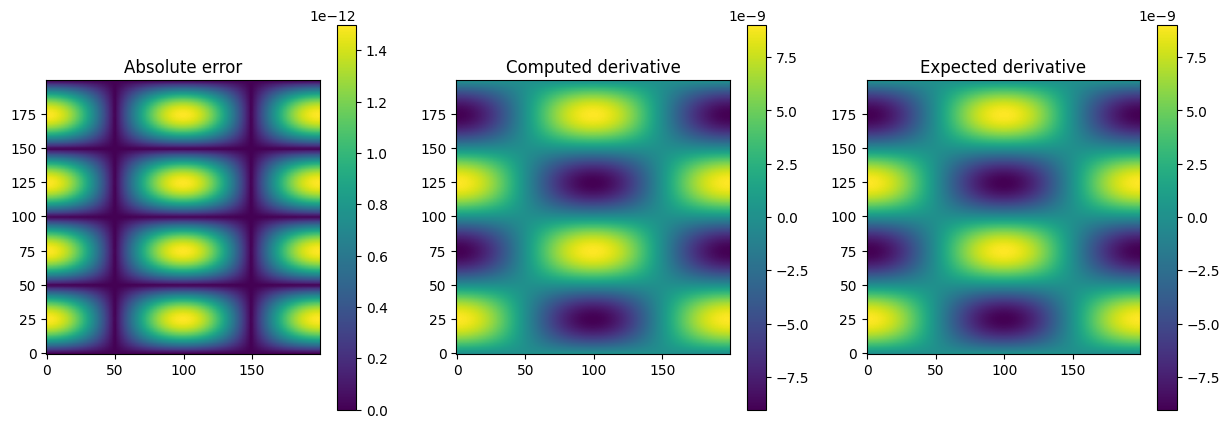

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos

R_SUN = 6.957e10
Lz = 0.01 * R_SUN
Ly = 0.01 * R_SUN

ny = 200
nz = 200

dz = Lz / (nz-1)
dy = Ly / (ny-1)

z,y = np.meshgrid(np.linspace(0, Lz, nz), np.linspace(0, Ly, ny), indexing='ij')
f = sin(4*pi*z/Lz)*sin(2*pi*y/Ly)

f_derivative_expected = 2*pi/Ly*sin(4*pi*z/Lz)*cos(2*pi*y/Ly)

f_derivative_computed = (np.roll(f, -1, axis=1) - np.roll(f, 1, axis=1))/(2*dy)


for i in range(nz):
    f_derivative_computed[i][0] = (f[i][1] - f[i][ny-2]) / (2*dy)
    f_derivative_computed[i][ny-1] = (f[i][1] - f[i][ny-2]) / (2*dy)

fig, ax = plt.subplots(1,3, figsize=(15,5))
im0 = ax[0].imshow(np.abs(f_derivative_expected - f_derivative_computed), origin='lower')
im1 = ax[1].imshow(f_derivative_computed, origin='lower')
im2 = ax[2].imshow(f_derivative_expected, origin='lower')
fig.colorbar(im0, ax=ax[0])
fig.colorbar(im1, ax=ax[1])
fig.colorbar(im2, ax=ax[2])
ax[0].set_title('Absolute error')
ax[1].set_title('Computed derivative')
ax[2].set_title('Expected derivative')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.integrate import cumtrapz

R_SUN = 6.957e10
G = 6.6743e-8

/usr/lib64/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
def read_solar_S_hdf5(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T'])
        rho0 = np.array(f['/rho'])
        p0 = np.array(f['/p'])
        
        r_over_R = np.flip(r_over_R)
        c_s = np.flip(c_s)
        Gamma_1 = np.flip(Gamma_1)
        T0 = np.flip(T0)
        rho0 = np.flip(rho0)
        p0 = np.flip(p0)

        variables = {'r_over_R': r_over_R, 'c_s': c_s, 'Gamma_1': Gamma_1, 'T0': T0, 'rho0': rho0, 'p0': p0}
    return variables

In [9]:
solar_S = read_solar_S_hdf5('../additional_files/solar_s.h5')

In [10]:
solar_S['M'] = 4*np.pi*R_SUN**3 * cumtrapz(solar_S['rho0']*(solar_S['r_over_R'])**2, solar_S['r_over_R'], initial=0)
solar_S['g'] = G*solar_S['M']/((solar_S['r_over_R']*R_SUN)**2)

/tmp/ipykernel_2761031/1508985719.py:2: RuntimeWarning: invalid value encountered in divide
  solar_S['g'] = G*solar_S['M']/((solar_S['r_over_R']*R_SUN)**2)


[]

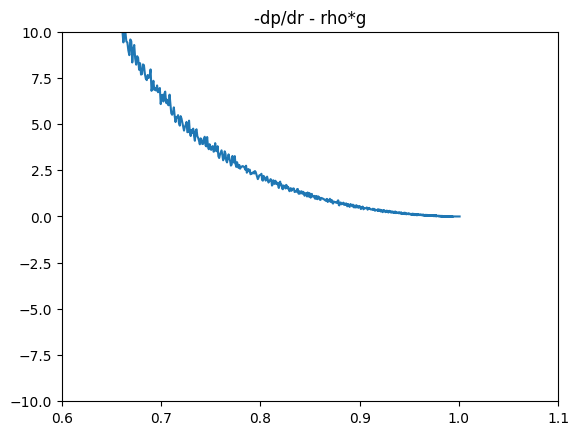

In [20]:
dp_dr = (np.roll(solar_S['p0'], -1) - np.roll(solar_S['p0'], 1))/(np.roll(solar_S['r_over_R'], -1) - np.roll(solar_S['r_over_R'], 1))

hydrostatic_eq = dp_dr/R_SUN + solar_S['rho0'] * solar_S['g']

plt.title("-dp/dr - rho*g")
plt.plot(solar_S['r_over_R'][:-1], -hydrostatic_eq[:-1])
plt.xlim(0.6, 1.1)
plt.ylim(-1e16,1e16)
plt.ylim(-1e1,1e1)
plt.plot()

In [1]:
ny = 50

(ny-2)%(ny-1)

48